# Global Power Plant Database


# Project Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.


# Step 1: importing necessary libraries and load the data


In [363]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')


In [364]:
#loading dataset
power=pd.read_csv(r'C:\Users\HP\Downloads\database_IND.csv')
power

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0                  NaN          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

# Key attributes of the database

The database includes the following indicators:
	
•	country: 3 character country code corresponding to the ISO 3166-1 alpha-3 specification

•	country_long : longer form of the country designation

•	name: name or title of the power plant, generally in Romanized form

•	gppd_idnr: 10 or 12 character identifier for the power plant

•	capacity_mw : electrical generating capacity in megawatts

•	latitude: geolocation in decimal degrees; WGS84 (EPSG:4326)

•	longitude: geolocation in decimal degrees; WGS84 (EPSG:4326)

•	primary_fuel: energy source used in primary electricity generation or export

•	other_fuel1: energy source used in electricity generation or export

•	other_fuel2: energy source used in electricity generation or export

•	other_fuel3: energy source used in electricity generation or export

•	commissioning_year: year of plant operation, weighted by unit-capacity when data is available

•	owner: majority shareholder of the power plant, generally in Romanized form

•	source: entity reporting the data; could be an organization, report, or document, generally in Romanized form

•	url : web document corresponding to the source field

•	geolocation_source : attribution for geolocation information

•	wepp_id: a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

•	year_of_capacity_data: year the capacity information was reported

•	generation_gwh_2013 : electricity generation in gigawatt-hours reported for the year 2013

•	generation_gwh_2014: electricity generation in gigawatt-hours reported for the year 2014

•	generation_gwh_2015 : electricity generation in gigawatt-hours reported for the year 2015

•	generation_gwh_2016 : electricity generation in gigawatt-hours reported for the year 2016

•	generation_gwh_2017: electricity generation in gigawatt-hours reported for the year 2017

•	generation_gwh_2018 : electricity generation in gigawatt-hours reported for the year 2018

•	generation_gwh_2019 : electricity generation in gigawatt-hours reported for the year 2019

•	generation_data_source : attribution for the reported generation information

•	estimated_generation_gwh_2013 : estimated electricity generation in gigawatt-hours for the year 2013

•	estimated_generation_gwh_2014 : estimated electricity generation in gigawatt-hours for the year 2014

•	estimated_generation_gwh_2015 : estimated electricity generation in gigawatt-hours for the year 2015

•	estimated_generation_gwh_2016 : estimated electricity generation in gigawatt-hours for the year 2016 

•	estimated_generation_gwh_2017 : estimated electricity generation in gigawatt-hours for the year 2017 

•	estimated_generation_note_2013 : label of the model/method used to estimate generation for the year 2013

•	estimated_generation_note_2014 : label of the model/method used to estimate generation for the year 2014 

•	estimated_generation_note_2015 : label of the model/method used to estimate generation for the year 2015

•	estimated_generation_note_2016 : label of the model/method used to estimate generation for the year 2016

•	estimated_generation_note_2017 : label of the model/method used to estimate generation for the year 2017 

total 27 columns out of which we have two target variables.

# Step 2: Exploratory Data Analysis (EDA)

In [365]:
#list of the columns in the dataset
power.columns.tolist()

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh']

In [366]:
# finding the shape of the dataset
power.shape

(907, 27)

there are 907 rows and 27 columns in the given dataset.

In [367]:
#checking the null values
power.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [368]:
#Getting the normal summary and statistical information of the data
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

lot of null values presented. now we have to clear those values.

now, remove some columns which have maximum no of null values because if we fill those values prediction will not be correct.

In [369]:
#droping some columns
power=power.drop(['estimated_generation_gwh','wepp_id','other_fuel3','other_fuel1','other_fuel2', 'generation_gwh_2013','generation_gwh_2019'],axis=1)

In [370]:
#checking the null values again
power.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [371]:
power['latitude'].value_counts()

19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: latitude, Length: 836, dtype: int64

In [372]:
power['geolocation_source'].value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [373]:
power['longitude'].value_counts()


71.6917    4
75.8988    3
71.6918    3
72.8983    3
81.2875    3
          ..
70.3961    1
74.2393    1
77.0435    1
73.8254    1
77.4768    1
Name: longitude, Length: 827, dtype: int64

In [374]:
power['commissioning_year'].value_counts()

2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1946.0     1
1956.0     1
1937.0     1
1949.0     1
1953.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [375]:
power['generation_gwh_2014'].value_counts()

0.000000       28
617.789264      1
359.139800      1
7368.390000     1
9983.018000     1
               ..
4436.700000     1
1154.342000     1
451.053400      1
3239.142900     1
3194.359820     1
Name: generation_gwh_2014, Length: 371, dtype: int64

In [376]:
power['generation_gwh_2015'].value_counts()

0.000000        27
843.747000       1
1497.798000      1
10422.690000     1
240.799900       1
                ..
6996.000000      1
14192.000000     1
219.377600       1
288.460450       1
0.994875         1
Name: generation_gwh_2015, Length: 396, dtype: int64

In [377]:
power['generation_gwh_2016'].value_counts()

0.000000       30
8470.570000     2
1511.000000     2
886.004428      1
90.644500       1
               ..
1338.095900     1
131.021600      1
6130.019928     1
5931.490000     1
233.596650      1
Name: generation_gwh_2016, Length: 403, dtype: int64

In [378]:
power['generation_gwh_2017'].value_counts()

0.00000        32
170.08530       2
663.77450       1
1632.36715      1
272.73945       1
               ..
15177.00000     1
191.94545       1
307.37540       1
382.43820       1
865.40000       1
Name: generation_gwh_2017, Length: 408, dtype: int64

In [379]:
power['generation_gwh_2018'].value_counts()

0.000000        39
626.239128       1
505.420200       1
1098.450150      1
17.213500        1
                ..
220.551700       1
7321.267900      1
6532.350000      1
15305.220000     1
686.500000       1
Name: generation_gwh_2018, Length: 410, dtype: int64

In [380]:
# applying fillna method
power['latitude']=power['latitude'].fillna(power['latitude'].mean())
power['geolocation_source']=power['geolocation_source'].fillna(power['geolocation_source'].mode()[0])

power['longitude']=power['longitude'].fillna(power['longitude'].median())
power['commissioning_year']=power['commissioning_year'].fillna(power['commissioning_year'].median())

power['generation_gwh_2014']=power['generation_gwh_2014'].fillna(power['generation_gwh_2014'].median())
power['generation_gwh_2015']=power['generation_gwh_2015'].fillna(power['generation_gwh_2015'].median())
power['generation_gwh_2016']=power['generation_gwh_2016'].fillna(power['generation_gwh_2016'].median())
power['generation_gwh_2017']=power['generation_gwh_2017'].fillna(power['generation_gwh_2017'].median())
power['generation_gwh_2018']=power['generation_gwh_2018'].fillna(power['generation_gwh_2018'].median())

In [381]:
power['source'].value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

In [382]:
power['gppd_idnr'].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

In [383]:
power['owner'].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

In [384]:
power['generation_data_source'].value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [385]:
power['year_of_capacity_data'].value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

In [386]:
power['url'].value_counts()

http://www.cea.nic.in/                                                              519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view                       1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
http://harshaengineers.com                                                            1
http://hiragroup.com/companies/godawari-green-energy-limited/                         1
https://cdm.unfccc.int/Projects/DB/RWTUV1345031355.85/view                            1
Name: url, Length: 304, dtype: i

now, removing some columns which has no effect on model

In [387]:
power=power.drop(['gppd_idnr','owner','generation_data_source','year_of_capacity_data','url'],axis=1)

In [388]:
power.isna().sum()

country                0
country_long           0
name                   0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [389]:
#finding the unique values
power.nunique()

country                  1
country_long             1
name                   907
capacity_mw            361
latitude               837
longitude              827
primary_fuel             8
commissioning_year      73
source                 191
geolocation_source       3
generation_gwh_2014    372
generation_gwh_2015    397
generation_gwh_2016    404
generation_gwh_2017    409
generation_gwh_2018    411
dtype: int64

In [390]:
power['country'].value_counts()

IND    907
Name: country, dtype: int64

In [391]:
power['country_long'].value_counts()

India    907
Name: country_long, dtype: int64

In [392]:
power['name'].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

Here we can see that both country and country_long column has same data and using these columns there will be no difference in predicting the model and name columns also has also no effect. so i am dropping these columns.

In [393]:
power=power.drop(['country','country_long','name'], axis=1)

In [394]:
power.head()

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0          2.5   28.1839    73.2407        Solar              2011.0   
1         98.0   24.7663    74.6090         Coal              2001.0   
2         39.2   21.9038    69.3732         Wind              2001.0   
3        135.0   23.8712    91.3602          Gas              2004.0   
4       1800.0   21.9603    82.4091         Coal              2015.0   

                                 source                    geolocation_source  \
0  National Renewable Energy Laboratory  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd                                   WRI   
2                                   CDM                                   WRI   
3         Central Electricity Authority                                   WRI   
4         Central Electricity Authority                                   WRI   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0           801.123775           711.181225           737.205450   
1           801.123775           711.181225           737.205450   
2           801.123775           711.181225           737.205450   
3           617.789264           843.747000           886.004428   
4          3035.550000          5916.370000          6243.000000   

   generation_gwh_2017  generation_gwh_2018  
0           817.977250           751.644375  
1           817.977250           751.644375  
2           817.977250           751.644375  
3           663.774500           626.239128  
4          5385.579736          7279.000000

yes, now it is fine.


In [395]:
power.shape

(907, 12)

In [396]:
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   907 non-null    object 
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


There is no more missing values 

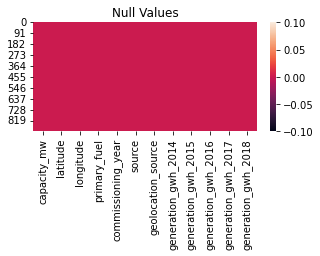

In [397]:
#Visualizing null values
plt.figure(figsize=[5,2])
sns.heatmap(power.isna())
plt.title("Null Values")
plt.show()


In [398]:
#checking the duplicates values
power.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
902    False
903    False
904    False
905    False
906    False
Length: 907, dtype: bool

now, there is no duplicate values in the data

In [399]:
power.describe()

capacity_mw    latitude   longitude  commissioning_year  \
count   907.000000  907.000000  907.000000          907.000000   
mean    326.223755   21.197918   77.427103         1998.728776   
std     590.085456    6.079148    4.815073           13.158621   
min       0.000000    8.168900   68.644700         1927.000000   
25%      16.725000   17.072000   74.388900         1998.000000   
50%      59.200000   21.281800   76.719500         2001.000000   
75%     385.250000   25.176450   79.206100         2003.000000   
max    4760.000000   34.649000   95.408000         2018.000000   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
count           907.000000           907.000000           907.000000   
mean           1516.689956          1510.071296          1565.361383   
std            2785.604307          2984.994556          3005.087210   
min               0.000000             0.000000             0.000000   
25%             801.123775           711.181225           737.205450   
50%             801.123775           711.181225           737.205450   
75%             801.123775           711.181225           737.205450   
max           28127.000000         30539.000000         30015.000000   

       generation_gwh_2017  generation_gwh_2018  
count           907.000000           907.000000  
mean           1657.121797          1665.011030  
std            3046.862910          3168.826750  
min               0.000000             0.000000  
25%             817.977250           751.644375  
50%             817.977250           751.644375  
75%             817.977250           751.644375  
max           35116.000000         35136.000000


The counts of columns are same which means there are no missing values present in the dataset.
The mean is more than the median(50%) in all the columns except latitude which means they are skewed to right.
The median is  greater than the mean in the column latitude which means it is skewed to left.
The difference between maximum and 75% we can infer that there are huge outliers present in most of the columns.
The minimum capacity of the power plant is zero and maximum is 4760 and there is huge difference in mean and standard deviation.

# Step 3: Visualization

# Univariate Analysis: 

In [400]:
#seperating the categorical column and numerical column
categorical_col=[]
for i in power.dtypes.index:
    if power.dtypes[i] == "object":
        categorical_col.append(i)
print("categorical column: ", categorical_col)
print("\n")

numerical_col=[]
for i in power.dtypes.index:
    if power.dtypes[i]!="object":
        numerical_col.append(i)
print("numerical column: ", numerical_col)
print("\n")

categorical column:  ['primary_fuel', 'source', 'geolocation_source']


numerical column:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']




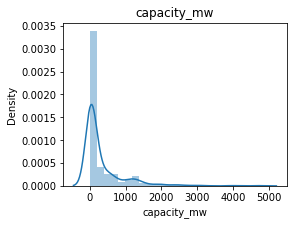

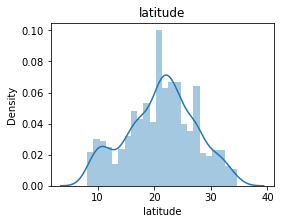

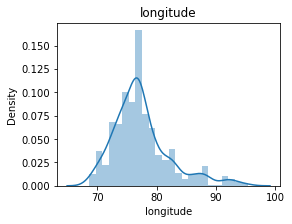

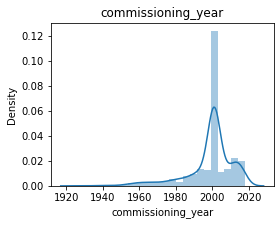

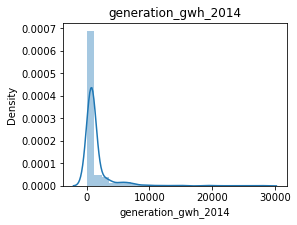

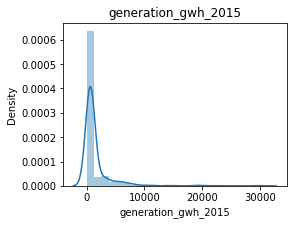

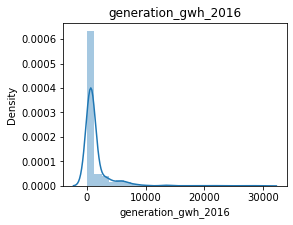

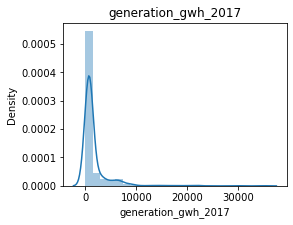

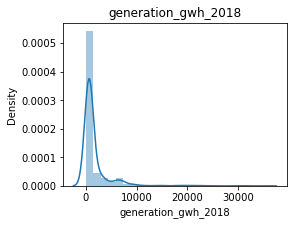

In [401]:
#distribution plot for numerical columns
for k in power[numerical_col]:              
    plt.figure(figsize = (4, 3))
    sns.distplot(power[k], bins = 24)
    plt.title(k)
    plt.show()

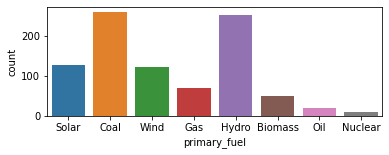

In [402]:
# Visualizing  the primary_fuel
plt.figure(figsize=(6,2))
sns.countplot(power['primary_fuel'])
plt.show()

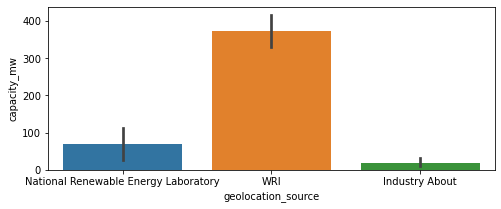

In [403]:
# let's check the relation between source and capacity_mw
plt.figure(figsize = (8,3))
sns.barplot(x = 'geolocation_source', y = 'capacity_mw', data=power)
plt.show()

geolocation source WRI is maximum which has more capacity and industry about has less capacity

# Bivariate Analysis:

# relationship between features and target variables

<AxesSubplot:xlabel='latitude', ylabel='capacity_mw'>

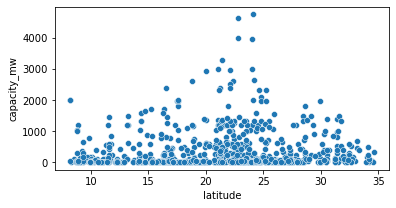

In [404]:
plt.figure(figsize=[6,3])

sns.scatterplot(power['latitude'],power['capacity_mw'])

there is no linear relation between latitude and capacity of the power plant

<AxesSubplot:xlabel='longitude', ylabel='capacity_mw'>

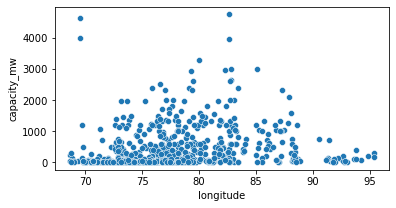

In [405]:
plt.figure(figsize=[6,3])

sns.scatterplot(power['longitude'],power['capacity_mw'])

There is very weak linear relation between longitude and capacity.

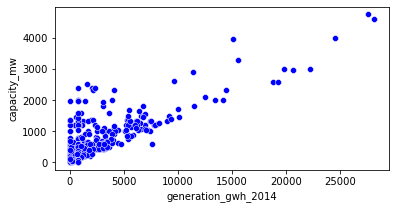

In [406]:
plt.figure(figsize = (6,3))

sns.scatterplot(x = 'generation_gwh_2014', y = 'capacity_mw', data = power,color='b')
plt.show()

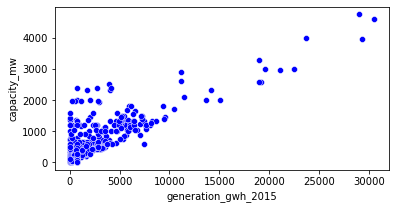

In [407]:
plt.figure(figsize = (6,3))

sns.scatterplot(x = 'generation_gwh_2015', y = 'capacity_mw', data = power,color='b')
plt.show()

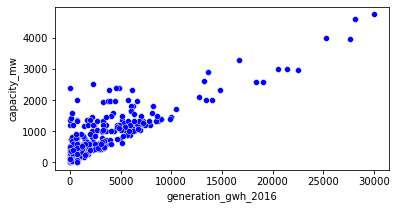

In [408]:
plt.figure(figsize = (6,3))

sns.scatterplot(x = 'generation_gwh_2016', y = 'capacity_mw', data = power,color='b')
plt.show()

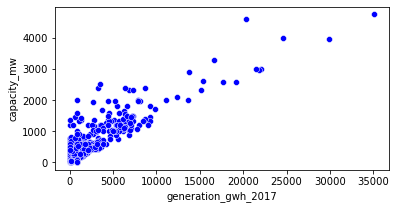

In [409]:
plt.figure(figsize = (6,3))

sns.scatterplot(x = 'generation_gwh_2017', y = 'capacity_mw', data = power,color='b')
plt.show()

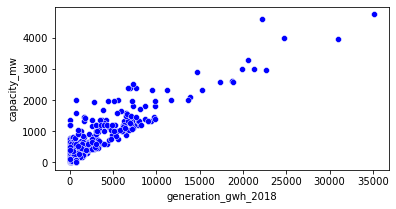

In [410]:
plt.figure(figsize = (6,3))

sns.scatterplot(x = 'generation_gwh_2018', y = 'capacity_mw', data = power,color='b')
plt.show()

There is positive linear relationship between the capacity and the electricity generation reported for the years mentioned.
As the electricity generation growth increases, the capacity of plant is also increasing moderately

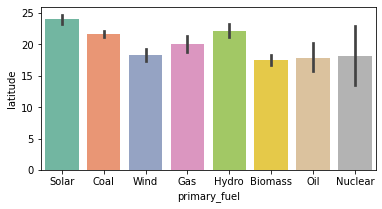

In [411]:
plt.figure(figsize = (6,3))
sns.barplot(x='primary_fuel',y='latitude', data=power,palette='Set2')
plt.show()

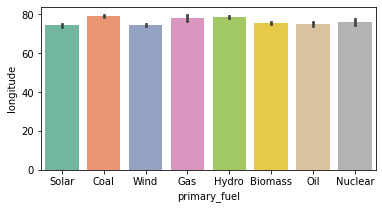

In [412]:
plt.figure(figsize = (6,3))
sns.barplot(x='primary_fuel',y='longitude', data=power,palette='Set2')
plt.show()

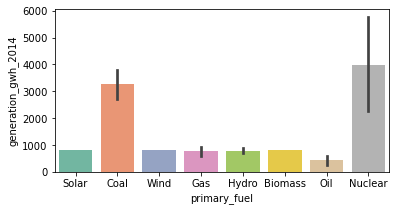

In [413]:
plt.figure(figsize = (6,3))
sns.barplot(x='primary_fuel',y='generation_gwh_2014', data=power,palette='Set2')
plt.show()

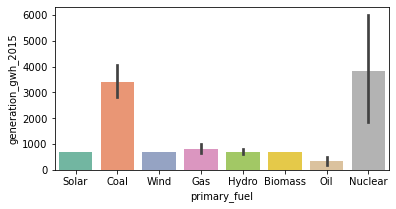

In [414]:
plt.figure(figsize = (6,3))
sns.barplot(x='primary_fuel',y='generation_gwh_2015', data=power,palette='Set2')
plt.show()

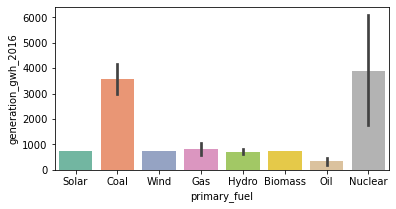

In [415]:
plt.figure(figsize = (6,3))
sns.barplot(x='primary_fuel',y='generation_gwh_2016', data=power,palette='Set2')
plt.show()

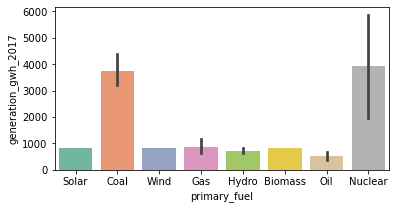

In [416]:
plt.figure(figsize = (6,3))
sns.barplot(x='primary_fuel',y='generation_gwh_2017', data=power,palette='Set2')
plt.show()

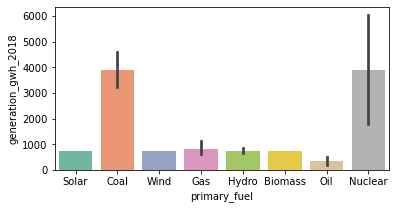

In [417]:
plt.figure(figsize = (6,3))
sns.barplot(x='primary_fuel',y='generation_gwh_2018', data=power,palette='Set2')
plt.show()

From the graph the Nuclear has high electrical generation reports for all the years followed by Coal.


# Multivariate Analysis

In [418]:
y1 =power["primary_fuel"]
y2 = power["capacity_mw"]
x = power.drop(["primary_fuel","capacity_mw"], axis=1)

In [419]:
power.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
commissioning_year     float64
source                  object
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [420]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in power.columns:
    power[column] = labelencoder.fit_transform(power[column])

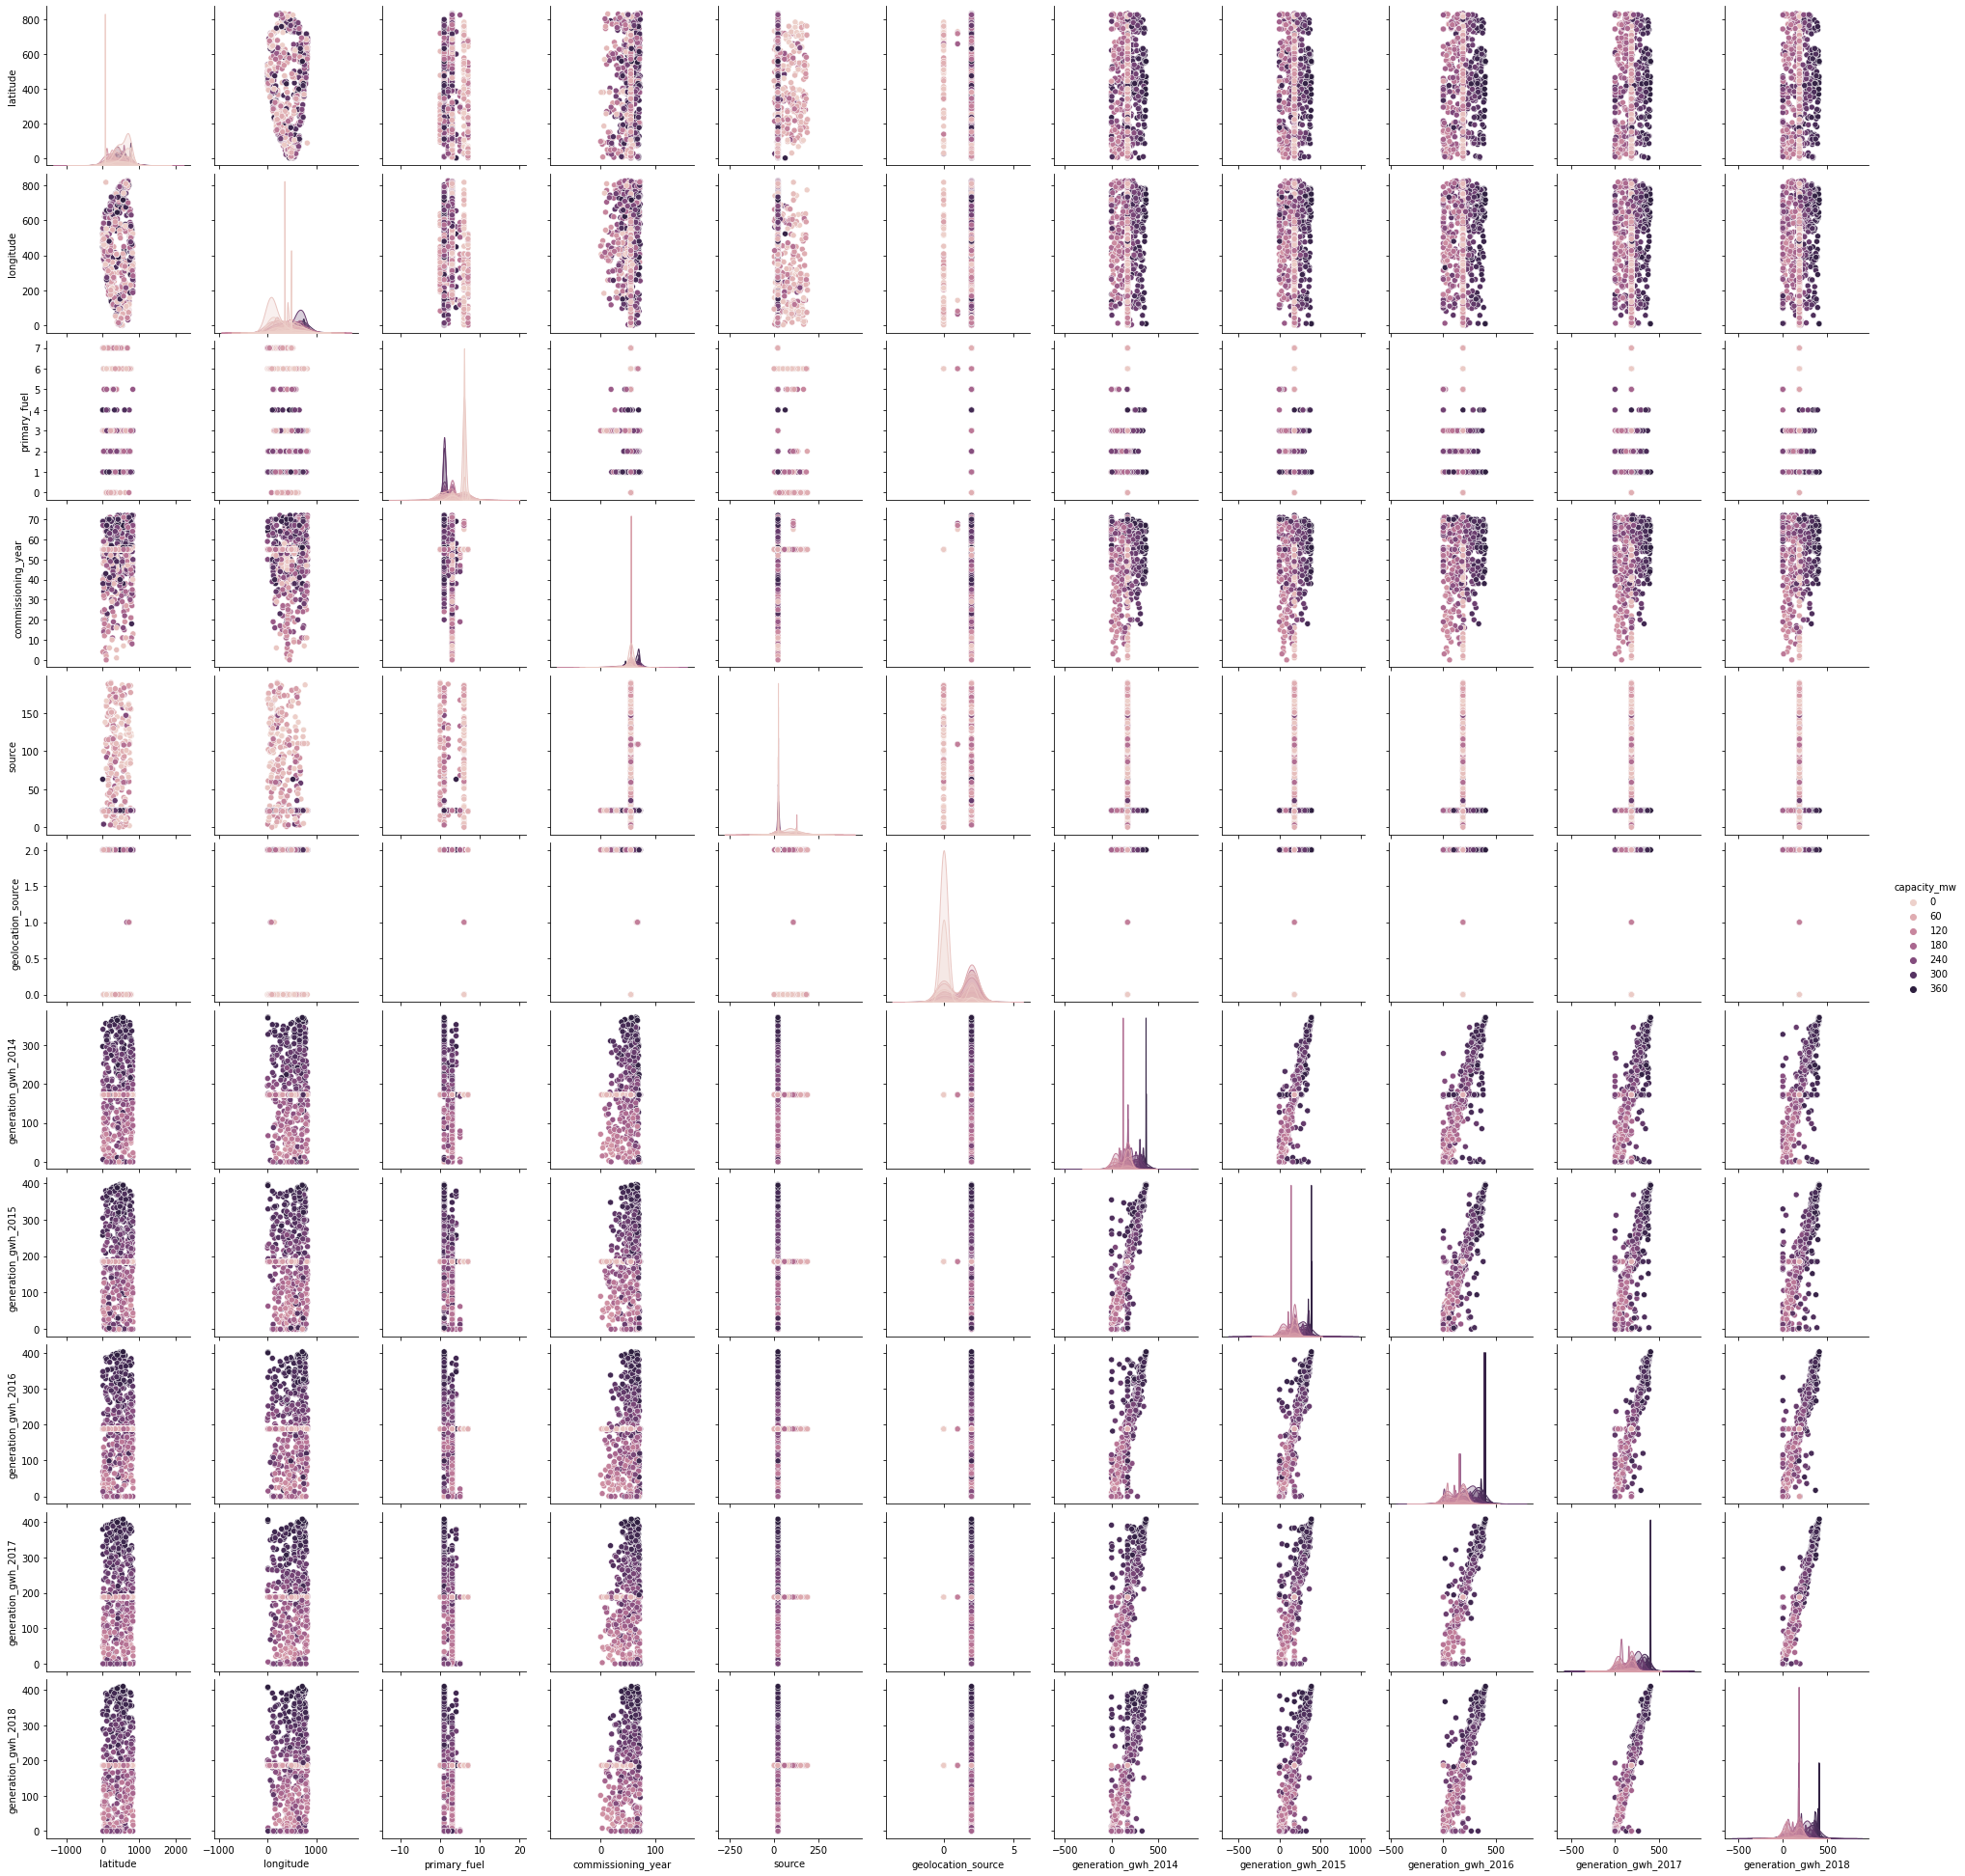

In [421]:
sns.pairplot(power,hue='capacity_mw')

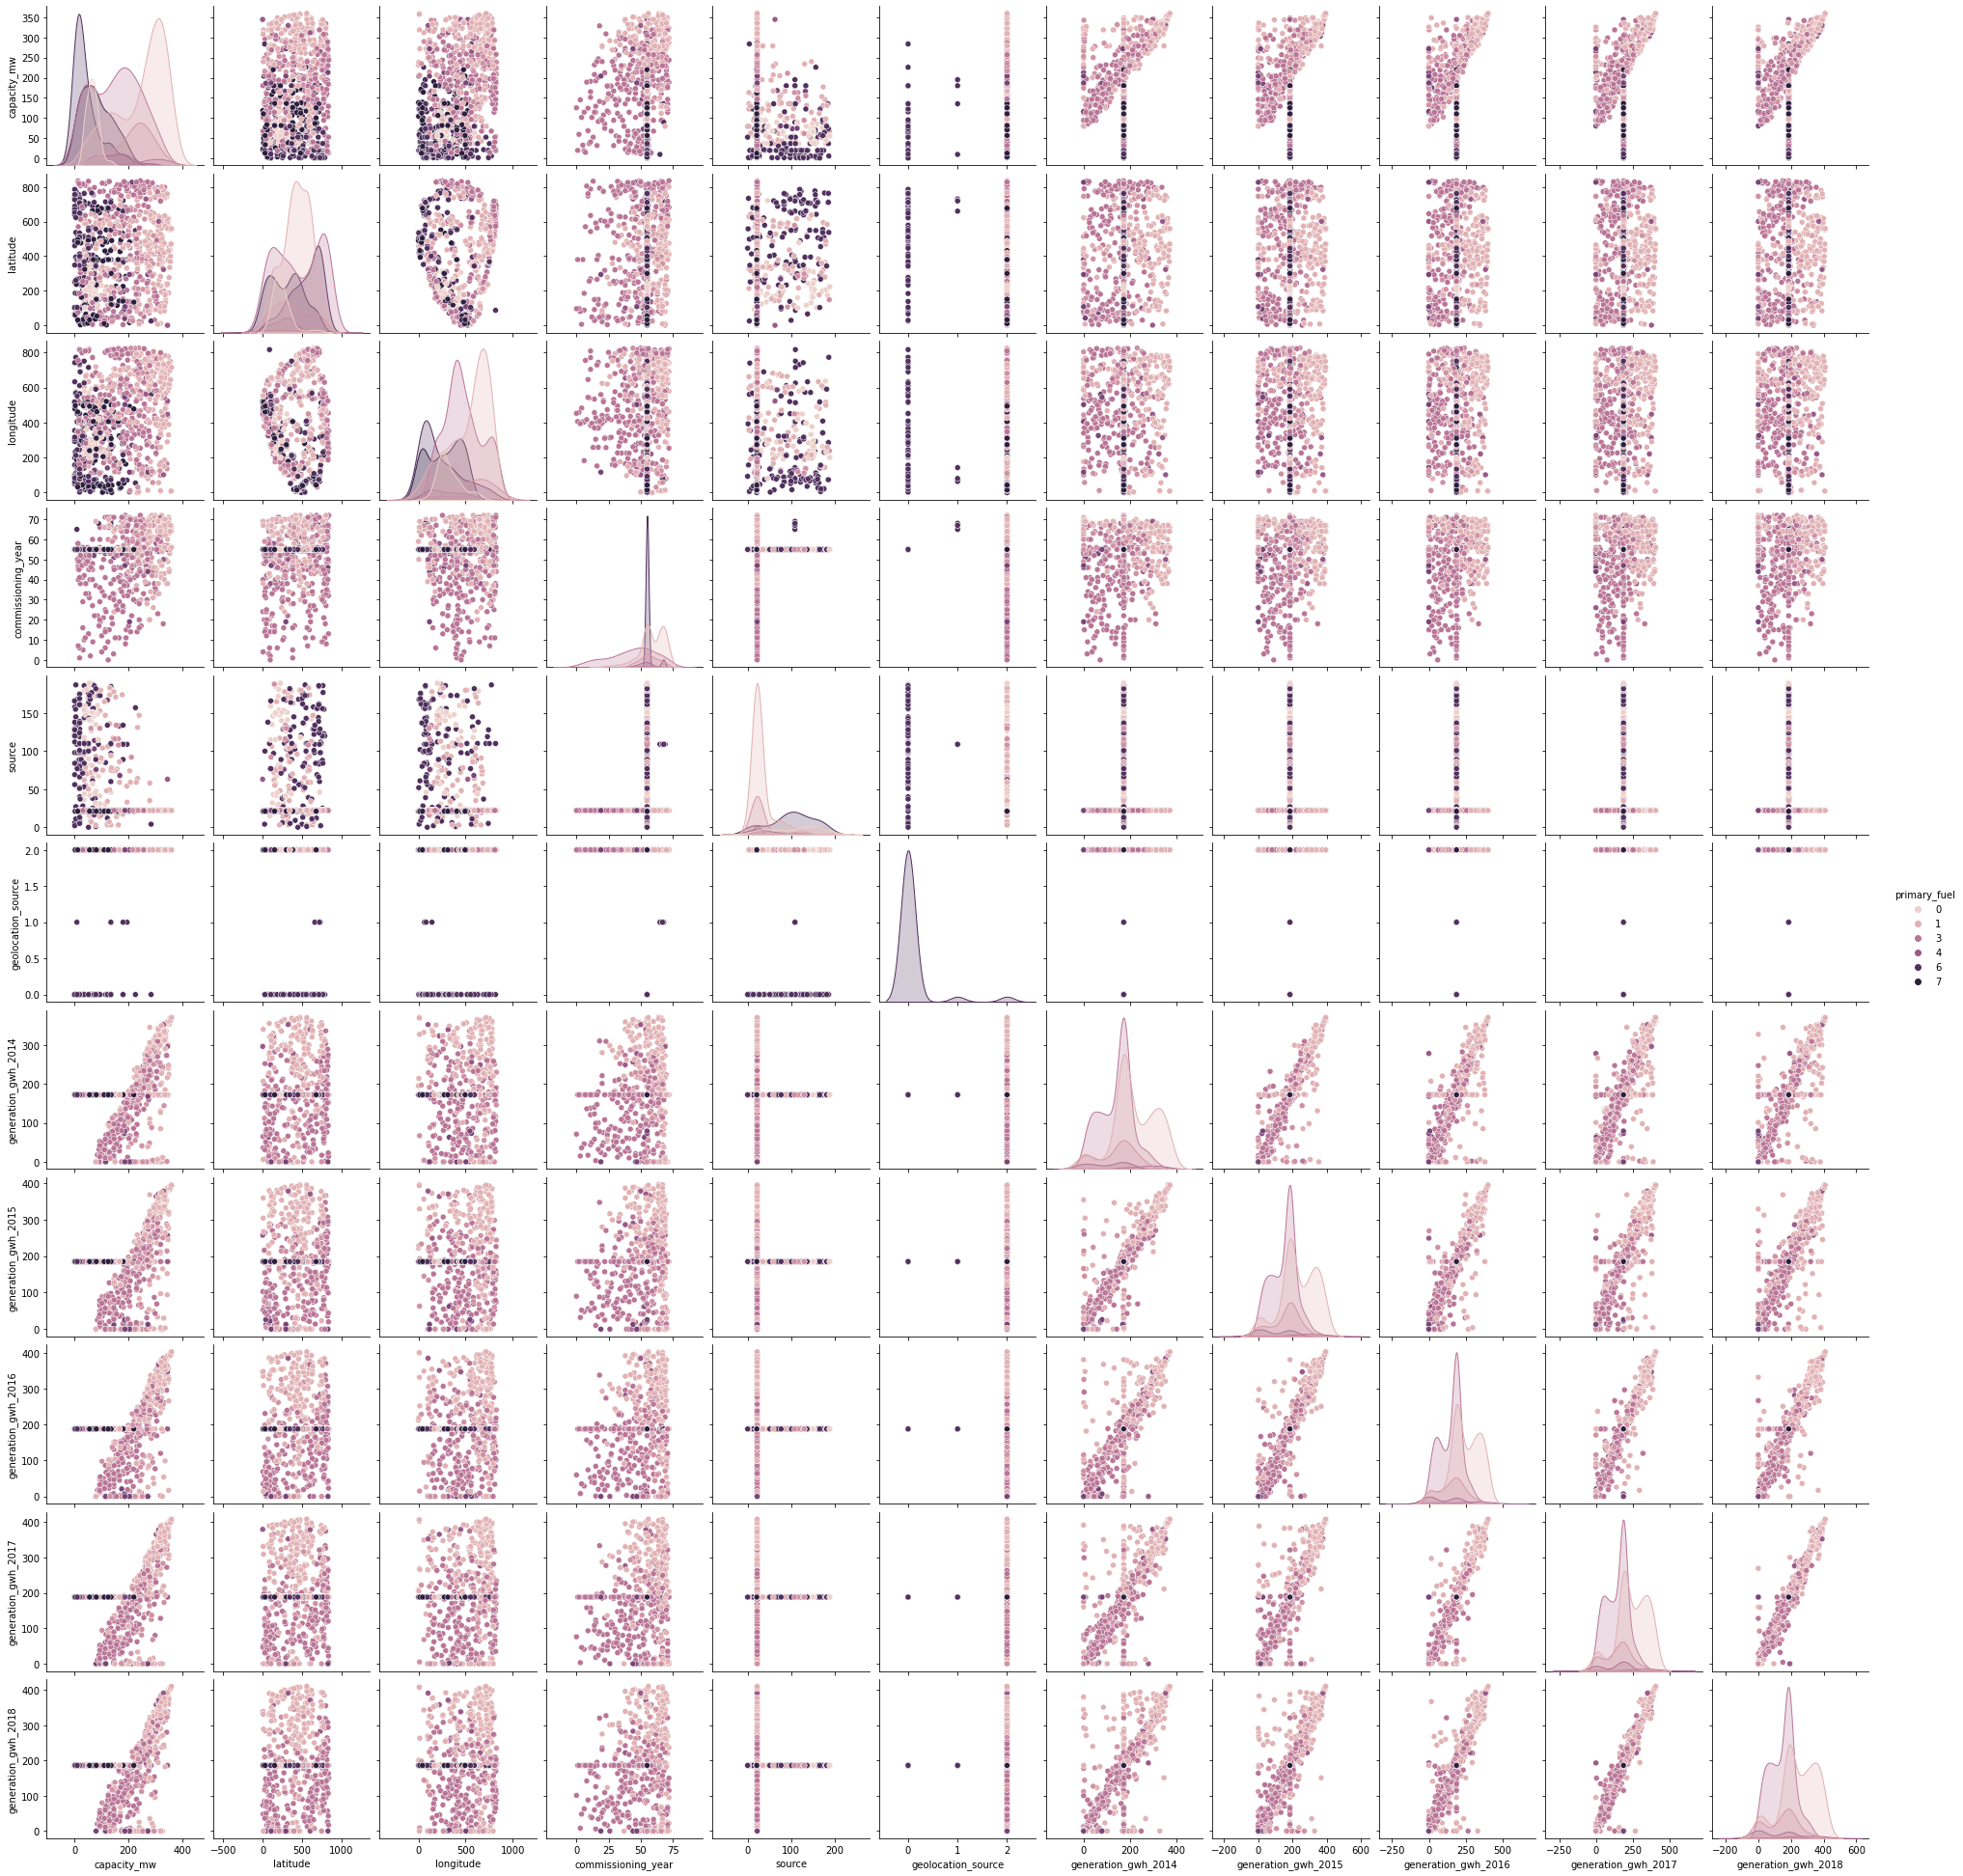

In [422]:
sns.pairplot(power,hue='primary_fuel')

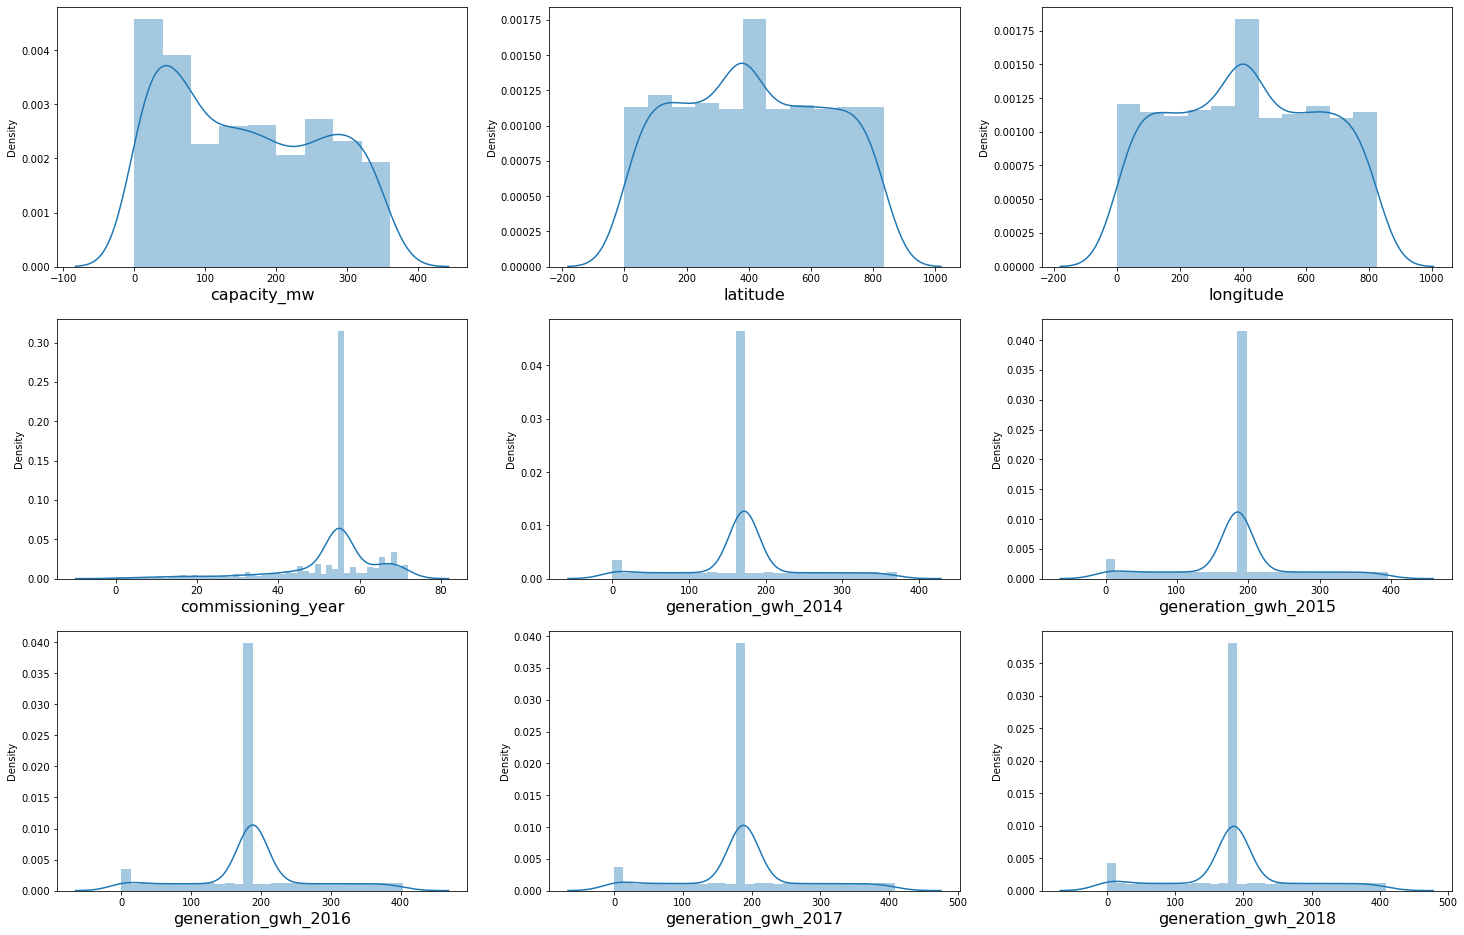

In [423]:
plt.figure(figsize=(25,22),facecolor="white")
plotnumber=1
for columns in numerical_col:
    if plotnumber<=12:
    
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(power[columns])
        plt.xlabel(columns, fontsize=16)
        
    plotnumber+=1
plt.show()

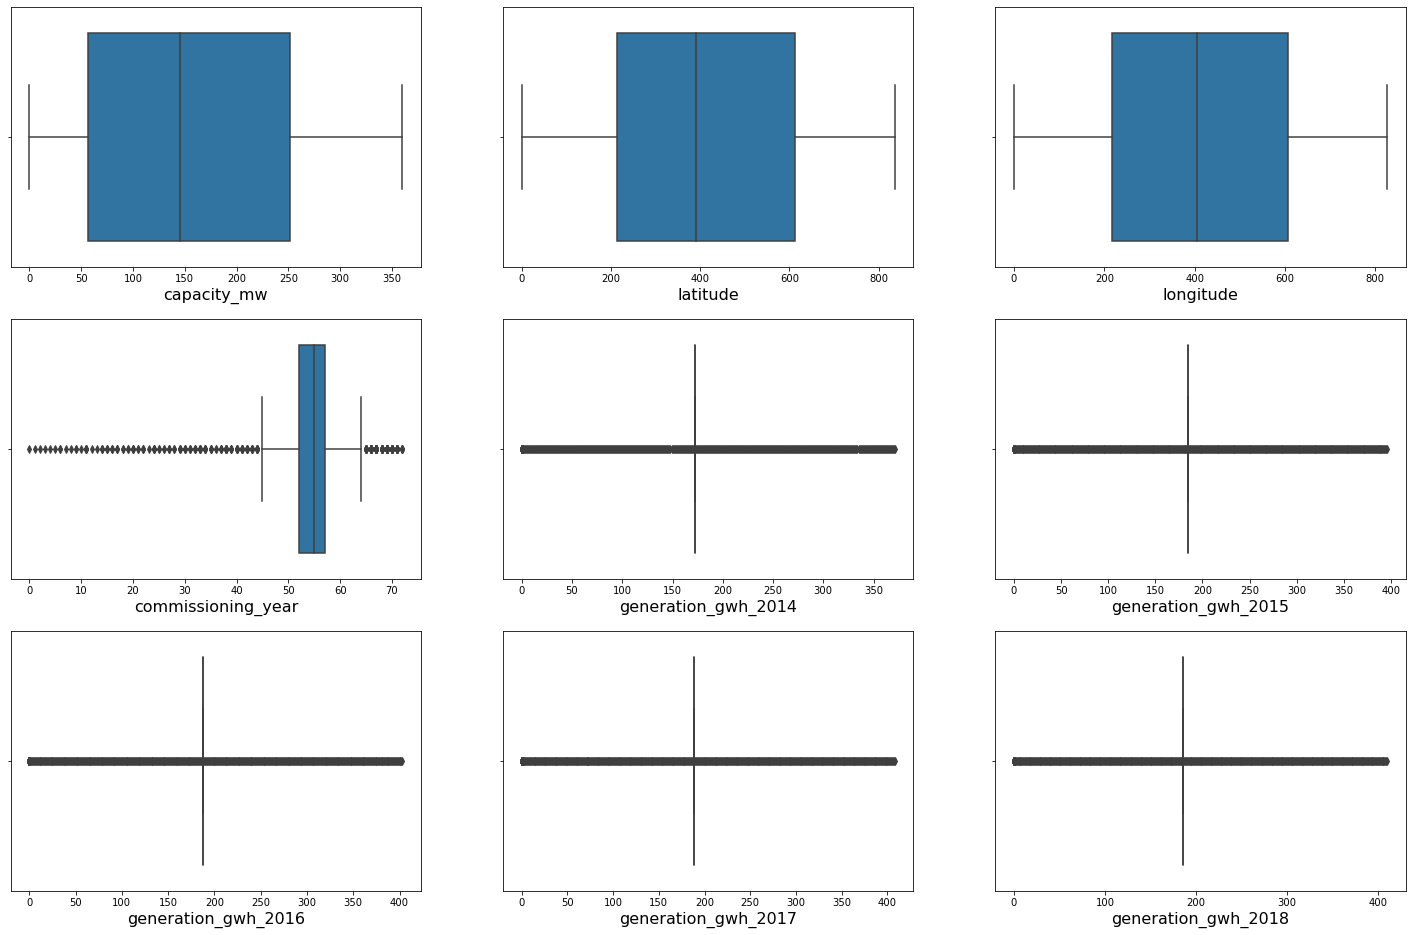

In [424]:
plt.figure(figsize=(25,22),facecolor="white")
plotnumber=1
for columns in numerical_col:
    if plotnumber<=12:
    
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(power[columns])
        plt.xlabel(columns, fontsize=16)
        
    plotnumber+=1
plt.show()

the outliers present in all columns except latitude,longitude. Even target column has outliers but no need to remove it.

In [426]:
y1 =power["primary_fuel"]
y2 = power["capacity_mw"]
x = power.drop(["primary_fuel","capacity_mw"], axis=1)

In [427]:
# removing outliers using statsmodel
from scipy import stats
from scipy.stats import zscore

z=np.abs(zscore(x))

threshold=3
np.where(z>3)
data=power[(z<3).all(axis=1)]

In [428]:
data

capacity_mw  latitude  longitude  primary_fuel  commissioning_year  \
0              9       731        143             6                  65   
1            177       594        234             1                  55   
2            121       420          8             7                  55   
3            200       547        805             2                  58   
4            340       423        701             1                  69   
..           ...       ...        ...           ...                 ...   
902          336       176        480             1                  70   
903           10       104        552             6                  55   
904           81       151        311             7                  55   
905          167       572        167             1                  55   
906           56        32        494             7                  55   

     source  geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0       109                   1                  172                  185   
1       174                   2                  172                  185   
2        21                   2                  172                  185   
3        22                   2                  156                  197   
4        22                   2                  272                  349   
..      ...                 ...                  ...                  ...   
902      22                   2                  172                    3   
903      77                   0                  172                  185   
904      21                   2                  172                  185   
905      59                   2                  172                  185   
906      21                   2                  172                  185   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0                    188                  188                  186  
1                    188                  188                  186  
2                    188                  188                  186  
3                    198                  176                  174  
4                    360                  339                  374  
..                   ...                  ...                  ...  
902                   99                  194                  182  
903                  188                  188                  186  
904                  188                  188                  186  
905                  188                  188                  186  
906                  188                  188                  186  

[869 rows x 12 columns]

In [429]:
z

latitude  longitude  commissioning_year    source  geolocation_source  \
0    1.344672   1.151331            0.946327  1.460215            1.083349   
1    0.764971   0.759816            0.171671  2.917019            0.394241   
2    0.028710   1.732150            0.171671  0.512075            0.394241   
3    0.566096   1.696835            0.404068  0.489662            0.394241   
4    0.041404   1.249389            1.256189  0.489662            0.394241   
..        ...        ...                 ...       ...                 ...   
902  1.003749   0.298566            1.333655  0.489662            0.394241   
903  1.308408   0.608336            0.171671  0.743019            2.560940   
904  1.109533   0.428534            0.171671  0.512075            0.394241   
905  0.671881   1.048074            0.171671  0.339596            0.394241   
906  1.613068   0.358799            0.171671  0.512075            0.394241   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0               0.005527             0.004692             0.003172   
1               0.005527             0.004692             0.003172   
2               0.005527             0.004692             0.003172   
3               0.217732             0.140790             0.113762   
4               1.320753             1.983552             2.008085   
..                   ...                  ...                  ...   
902             0.005527             2.211157             1.043880   
903             0.005527             0.004692             0.003172   
904             0.005527             0.004692             0.003172   
905             0.005527             0.004692             0.003172   
906             0.005527             0.004692             0.003172   

     generation_gwh_2017  generation_gwh_2018  
0               0.007564             0.009139  
1               0.007564             0.009139  
2               0.007564             0.009139  
3               0.144995             0.143378  
4               1.721778             2.093935  
..                   ...                  ...  
902             0.061152             0.053885  
903             0.007564             0.009139  
904             0.007564             0.009139  
905             0.007564             0.009139  
906             0.007564             0.009139  

[907 rows x 10 columns]

In [430]:
dataloss=(907-869)/907*100
dataloss

4.189636163175303

In [431]:
data.head()

capacity_mw  latitude  longitude  primary_fuel  commissioning_year  source  \
0            9       731        143             6                  65     109   
1          177       594        234             1                  55     174   
2          121       420          8             7                  55      21   
3          200       547        805             2                  58      22   
4          340       423        701             1                  69      22   

   geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0                   1                  172                  185   
1                   2                  172                  185   
2                   2                  172                  185   
3                   2                  156                  197   
4                   2                  272                  349   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0                  188                  188                  186  
1                  188                  188                  186  
2                  188                  188                  186  
3                  198                  176                  174  
4                  360                  339                  374

In [432]:

#corelation b/n features and target variable.
corr=data.corr()
corr

capacity_mw  latitude  longitude  primary_fuel  \
capacity_mw             1.000000  0.080314   0.368633     -0.534679   
latitude                0.080314  1.000000  -0.046208     -0.000149   
longitude               0.368633 -0.046208   1.000000     -0.409734   
primary_fuel           -0.534679 -0.000149  -0.409734      1.000000   
commissioning_year      0.158052  0.073937   0.067845     -0.077938   
source                 -0.396711  0.058339  -0.274388      0.078707   
geolocation_source      0.434586 -0.205838   0.304703     -0.475687   
generation_gwh_2014     0.356987  0.101582   0.044627     -0.155282   
generation_gwh_2015     0.357542  0.095362   0.039097     -0.163952   
generation_gwh_2016     0.380699  0.114655   0.097721     -0.179723   
generation_gwh_2017     0.389999  0.091976   0.087333     -0.173209   
generation_gwh_2018     0.386099  0.093756   0.085719     -0.175572   

                     commissioning_year    source  geolocation_source  \
capacity_mw                    0.158052 -0.396711            0.434586   
latitude                       0.073937  0.058339           -0.205838   
longitude                      0.067845 -0.274388            0.304703   
primary_fuel                  -0.077938  0.078707           -0.475687   
commissioning_year             1.000000  0.069293           -0.046156   
source                         0.069293  1.000000           -0.526891   
geolocation_source            -0.046156 -0.526891            1.000000   
generation_gwh_2014            0.109198 -0.012214            0.009995   
generation_gwh_2015            0.141430 -0.010792            0.008832   
generation_gwh_2016            0.202296 -0.011667            0.009548   
generation_gwh_2017            0.182910 -0.012749            0.010433   
generation_gwh_2018            0.193435 -0.011684            0.009562   

                     generation_gwh_2014  generation_gwh_2015  \
capacity_mw                     0.356987             0.357542   
latitude                        0.101582             0.095362   
longitude                       0.044627             0.039097   
primary_fuel                   -0.155282            -0.163952   
commissioning_year              0.109198             0.141430   
source                         -0.012214            -0.010792   
geolocation_source              0.009995             0.008832   
generation_gwh_2014             1.000000             0.865089   
generation_gwh_2015             0.865089             1.000000   
generation_gwh_2016             0.826315             0.896404   
generation_gwh_2017             0.767653             0.805745   
generation_gwh_2018             0.770786             0.805515   

                     generation_gwh_2016  generation_gwh_2017  \
capacity_mw                     0.380699             0.389999   
latitude                        0.114655             0.091976   
longitude                       0.097721             0.087333   
primary_fuel                   -0.179723            -0.173209   
commissioning_year              0.202296             0.182910   
source                         -0.011667            -0.012749   
geolocation_source              0.009548             0.010433   
generation_gwh_2014             0.826315             0.767653   
generation_gwh_2015             0.896404             0.805745   
generation_gwh_2016             1.000000             0.907473   
generation_gwh_2017             0.907473             1.000000   
generation_gwh_2018             0.899963             0.951753   

                     generation_gwh_2018  
capacity_mw                     0.386099  
latitude                        0.093756  
longitude                       0.085719  
primary_fuel                   -0.175572  
commissioning_year              0.193435  
source                         -0.011684  
geolocation_source              0.009562  
generation_gwh_2014             0.770786  
generation_gwh_2015             0.805515  
generation_gwh_2016      

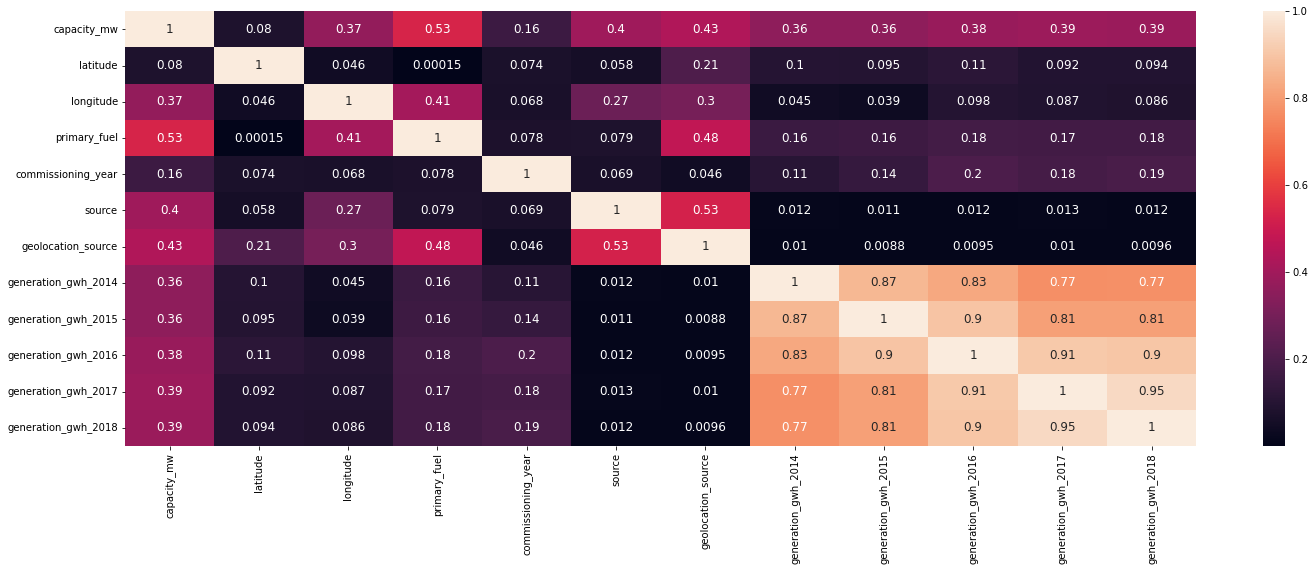

In [433]:
df_corr=data.corr().abs()
plt.figure(figsize=(24,8))
sns.heatmap(df_corr, annot=True, linecolor='blue', annot_kws={'size':12},)
plt.show()

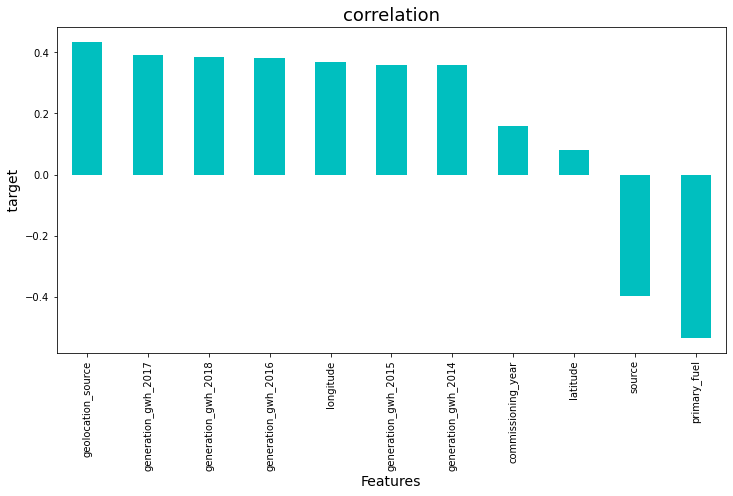

In [434]:
plt.figure(figsize=(12,6))
data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel(' target ',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

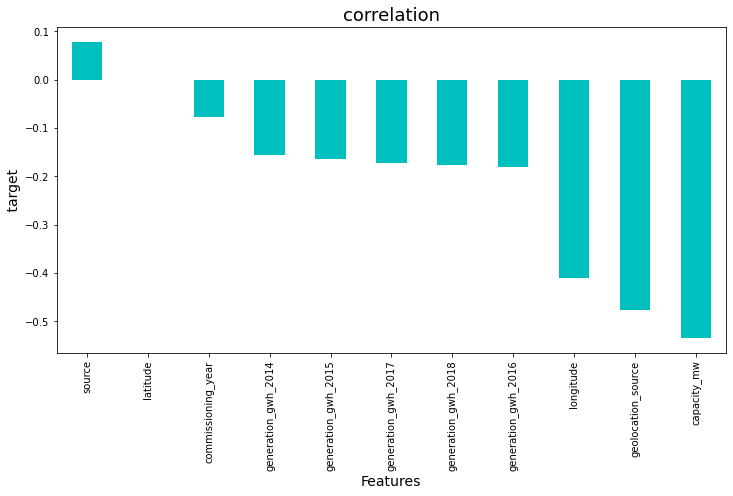

In [435]:
plt.figure(figsize=(12,6))
data.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel(' target ',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

latitude has very less correlation with both targets. so lets drop this column.

In [436]:
data=data.drop('latitude',axis=1)

In [443]:
# checking skewness
data.skew()

capacity_mw            0.196020
longitude              0.014506
primary_fuel           0.463595
commissioning_year    -1.189834
source                 1.840697
geolocation_source    -2.158973
generation_gwh_2014    0.072364
generation_gwh_2015    0.047757
generation_gwh_2016    0.054286
generation_gwh_2017    0.077176
generation_gwh_2018    0.095983
dtype: float64

In [444]:
#Removing skewness of the data
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in data.columns:
    if abs(data.loc[:,i].skew())>0.5:
        data.loc[:,i]=PT.fit_transform(data.loc[:,i].values.reshape(-1,1))

In [445]:
data.skew()

capacity_mw            0.196020
longitude              0.014506
primary_fuel           0.463595
commissioning_year    -0.058547
source                -0.203234
geolocation_source    -2.130711
generation_gwh_2014    0.072364
generation_gwh_2015    0.047757
generation_gwh_2016    0.054286
generation_gwh_2017    0.077176
generation_gwh_2018    0.095983
dtype: float64

In [446]:
b1 =data["primary_fuel"]
b2 = data["capacity_mw"]
a = data.drop(["primary_fuel","capacity_mw"], axis=1)

In [447]:
scaler=StandardScaler()

x_scaled=scaler.fit_transform(a)
x_scaled
a=pd.DataFrame(scaler.fit_transform(a),columns=a.columns)
a

longitude  commissioning_year    source  geolocation_source  \
0    -1.141165            1.165000  1.648698           -2.343512   
1    -0.752210           -0.041808  2.123168            0.396358   
2    -1.718185           -0.041808 -0.459363            0.396358   
3     1.688374            0.290764 -0.389842            0.396358   
4     1.243854            1.728306 -0.389842            0.396358   
..         ...                 ...       ...                 ...   
864   0.299250            1.876564 -0.389842            0.396358   
865   0.606994           -0.041808  1.262625           -2.528868   
866  -0.423094           -0.041808 -0.459363            0.396358   
867  -1.038583           -0.041808  0.946341            0.396358   
868   0.359089           -0.041808 -0.459363            0.396358   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0              -0.025339            -0.022390            -0.024205   
1              -0.025339            -0.022390            -0.024205   
2              -0.025339            -0.022390            -0.024205   
3              -0.236176             0.121734             0.092199   
4               1.292397             1.947298             1.977937   
..                   ...                  ...                  ...   
864            -0.025339            -2.208263            -1.060197   
865            -0.025339            -0.022390            -0.024205   
866            -0.025339            -0.022390            -0.024205   
867            -0.025339            -0.022390            -0.024205   
868            -0.025339            -0.022390            -0.024205   

     generation_gwh_2017  generation_gwh_2018  
0              -0.026450            -0.024241  
1              -0.026450            -0.024241  
2              -0.026450            -0.024241  
3              -0.162791            -0.157004  
4               1.689176             2.055725  
..                   ...                  ...  
864             0.041721            -0.068495  
865            -0.026450            -0.024241  
866            -0.026450            -0.024241  
867            -0.026450            -0.024241  
868            -0.026450            -0.024241  

[869 rows x 9 columns]

In [448]:
x_scaled

array([[-1.14116464,  1.16500048,  1.64869783, ..., -0.02420498,
        -0.02644976, -0.02424072],
       [-0.75220993, -0.04180777,  2.12316842, ..., -0.02420498,
        -0.02644976, -0.02424072],
       [-1.71818535, -0.04180777, -0.45936269, ..., -0.02420498,
        -0.02644976, -0.02424072],
       ...,
       [-0.42309442, -0.04180777, -0.45936269, ..., -0.02420498,
        -0.02644976, -0.02424072],
       [-1.03858318, -0.04180777,  0.94634075, ..., -0.02420498,
        -0.02644976, -0.02424072],
       [ 0.35908921, -0.04180777, -0.45936269, ..., -0.02420498,
        -0.02644976, -0.02424072]])

In [449]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression,Lasso,Ridge

from sklearn.metrics import  roc_curve,roc_auc_score,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [450]:
#checking multicollineraity
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a.values,i) for i in range(len(a.columns))] 

vif['features']=a.columns
vif

VIF values             features
0    1.161826            longitude
1    1.076214   commissioning_year
2    1.212537               source
3    1.276690   geolocation_source
4    4.309891  generation_gwh_2014
5    6.902605  generation_gwh_2015
6   10.866573  generation_gwh_2016
7   12.479844  generation_gwh_2017
8   11.645988  generation_gwh_2018

In [453]:
a=a.drop('generation_gwh_2017', axis=1)

In [454]:
#checking multicollineraity
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a.values,i) for i in range(len(a.columns))] 

vif['features']=a.columns
vif

VIF values             features
0    1.161819            longitude
1    1.074732   commissioning_year
2    1.212532               source
3    1.276677   geolocation_source
4    4.308641  generation_gwh_2014
5    6.878220  generation_gwh_2015
6    9.725850  generation_gwh_2016
7    5.362776  generation_gwh_2018

In [527]:
b1.value_counts()

1    254
3    228
7    123
6    122
2     68
0     45
5     20
4      9
Name: primary_fuel, dtype: int64

In [528]:
#balancing the label values.
from imblearn.over_sampling import SMOTE
sampling= SMOTE()

a,b1=sampling.fit_resample(a,b1)

In [529]:
b1.value_counts()

6    254
1    254
7    254
2    254
3    254
0    254
5    254
4    254
Name: primary_fuel, dtype: int64

# step4: Modelling (primary_fuel)
 
# Decision Tree Classifier

In [530]:
scaler=StandardScaler()

x_scaled=scaler.fit_transform(a)
x_scaled

array([[-1.05771012,  1.52560911,  1.43541789, ...,  0.02417719,
         0.04881045,  0.04730715],
       [-0.62380959,  0.02660925,  1.89989932, ...,  0.02417719,
         0.04881045,  0.04730715],
       [-1.70140873,  0.02660925, -0.62826102, ...,  0.02417719,
         0.04881045,  0.04730715],
       ...,
       [-0.72142646,  0.02660925, -0.62826102, ...,  0.02417719,
         0.04881045,  0.04730715],
       [-0.5504573 ,  0.02660925, -0.62826102, ...,  0.02417719,
         0.04881045,  0.04730715],
       [-0.21546011,  0.02660925, -0.62826102, ...,  0.02417719,
         0.04881045,  0.04730715]])

In [531]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [532]:
#getting best random state

Accu_max=0
Rs_max=0
for k in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(a,b1, test_size=0.22, random_state=k)
    
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu_max:
        Accu_max= acc
        Rs_max=k
print('The best accuracy is', Accu_max, 'at random state is', Rs_max)

The best accuracy is 0.9308035714285714 at random state is 36


In [534]:
#forming train_test_split
x_train,x_test,y_train,y_test=train_test_split(a,b1, test_size=0.22, random_state=36)

In [535]:
def metric_score(clf, x_train,x_test,y_train,y_test,train=True):
    if train==False:
        pred=clf.predict(x_test)
        
        print("\n================ Test Result ================== ")
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:2f}%")
        print('\n \n Test Classification Reprt \n', classification_report(y_test,pred, digits=2))
        

In [536]:
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
metric_score(dc,x_train,x_test,y_train,y_test, train=True)
metric_score(dc,x_train,x_test,y_train,y_test, train=False)
y_pred=dc.predict(x_test)
probs_dc=dc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 87.946429%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.91      0.92      0.92        53
           1       0.83      0.63      0.72        62
           2       0.77      0.70      0.73        57
           3       0.74      0.83      0.78        52
           4       0.95      0.98      0.96        56
           5       0.85      1.00      0.92        56
           6       1.00      1.00      1.00        59
           7       0.98      1.00      0.99        53

    accuracy                           0.88       448
   macro avg       0.88      0.88      0.88       448
weighted avg       0.88      0.88      0.88       448



array([[49,  2,  0,  1,  0,  1,  0,  0],
       [ 4, 39,  8,  7,  2,  2,  0,  0],
       [ 1,  3, 40,  6,  0,  6,  0,  1],
       [ 0,  3,  4, 43,  1,  1,  0,  0],
       [ 0,  0,  0,  1, 55,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 56,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 59,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 53]], dtype=int64)

In [537]:
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
metric_score(kn,x_train,x_test,y_train,y_test, train=True)
metric_score(kn,x_train,x_test,y_train,y_test, train=False)
y_pred=kn.predict(x_test)
probs_kn=kn.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)



================ Test Result ================== 
Accuracy Score: 86.383929%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90        53
           1       0.83      0.61      0.70        62
           2       0.71      0.77      0.74        57
           3       0.79      0.71      0.75        52
           4       0.95      0.98      0.96        56
           5       0.88      0.89      0.88        56
           6       1.00      1.00      1.00        59
           7       0.90      1.00      0.95        53

    accuracy                           0.86       448
   macro avg       0.86      0.87      0.86       448
weighted avg       0.86      0.86      0.86       448



array([[51,  0,  0,  0,  0,  1,  0,  1],
       [ 6, 38,  9,  5,  2,  2,  0,  0],
       [ 2,  3, 44,  5,  0,  1,  0,  2],
       [ 0,  4,  6, 37,  0,  3,  0,  2],
       [ 0,  1,  0,  0, 55,  0,  0,  0],
       [ 1,  0,  3,  0,  1, 50,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 59,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 53]], dtype=int64)

In [538]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
metric_score(rfc,x_train,x_test,y_train,y_test, train=True)
metric_score(rfc,x_train,x_test,y_train,y_test, train=False)
y_pred=rfc.predict(x_test)
probs_rfc=rfc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 92.187500%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93        53
           1       0.95      0.68      0.79        62
           2       0.85      0.88      0.86        57
           3       0.81      0.88      0.84        52
           4       0.93      1.00      0.97        56
           5       0.96      0.98      0.97        56
           6       1.00      1.00      1.00        59
           7       1.00      1.00      1.00        53

    accuracy                           0.92       448
   macro avg       0.92      0.93      0.92       448
weighted avg       0.93      0.92      0.92       448



array([[52,  0,  0,  1,  0,  0,  0,  0],
       [ 5, 42,  5,  6,  2,  2,  0,  0],
       [ 2,  1, 50,  4,  0,  0,  0,  0],
       [ 0,  1,  3, 46,  2,  0,  0,  0],
       [ 0,  0,  0,  0, 56,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 55,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 59,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 53]], dtype=int64)

In [539]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
metric_score(GB,x_train,x_test,y_train,y_test, train=True)
metric_score(GB,x_train,x_test,y_train,y_test, train=False)
y_pred=GB.predict(x_test)
probs_GB=GB.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 91.964286%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91        53
           1       0.87      0.77      0.82        62
           2       0.84      0.82      0.83        57
           3       0.92      0.85      0.88        52
           4       0.92      0.98      0.95        56
           5       0.96      0.98      0.97        56
           6       1.00      1.00      1.00        59
           7       0.98      1.00      0.99        53

    accuracy                           0.92       448
   macro avg       0.92      0.92      0.92       448
weighted avg       0.92      0.92      0.92       448



array([[51,  1,  0,  1,  0,  0,  0,  0],
       [ 6, 48,  4,  1,  2,  1,  0,  0],
       [ 2,  4, 47,  1,  1,  1,  0,  1],
       [ 0,  2,  4, 44,  2,  0,  0,  0],
       [ 0,  0,  0,  1, 55,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 55,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 59,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 53]], dtype=int64)

In [540]:
bag=BaggingClassifier()
bag.fit(x_train,y_train)
metric_score(bag,x_train,x_test,y_train,y_test, train=True)
metric_score(bag,x_train,x_test,y_train,y_test, train=False)
y_pred=bag.predict(x_test)
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 89.955357%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.93      0.96      0.94        53
           1       0.88      0.71      0.79        62
           2       0.75      0.79      0.77        57
           3       0.80      0.83      0.81        52
           4       0.93      0.98      0.96        56
           5       0.93      0.95      0.94        56
           6       1.00      1.00      1.00        59
           7       0.98      1.00      0.99        53

    accuracy                           0.90       448
   macro avg       0.90      0.90      0.90       448
weighted avg       0.90      0.90      0.90       448



array([[51,  1,  0,  1,  0,  0,  0,  0],
       [ 3, 44,  7,  5,  1,  2,  0,  0],
       [ 1,  4, 45,  4,  0,  2,  0,  1],
       [ 0,  1,  5, 43,  3,  0,  0,  0],
       [ 0,  0,  0,  1, 55,  0,  0,  0],
       [ 0,  0,  3,  0,  0, 53,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 59,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 53]], dtype=int64)

In [541]:
Etc=ExtraTreesClassifier()
Etc.fit(x_train,y_train)
metric_score(Etc,x_train,x_test,y_train,y_test, train=True)
metric_score(Etc,x_train,x_test,y_train,y_test, train=False)
y_pred=Etc.predict(x_test)
probs_Etc=Etc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 91.741071%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.89      0.94      0.92        53
           1       0.88      0.71      0.79        62
           2       0.83      0.88      0.85        57
           3       0.82      0.87      0.84        52
           4       0.98      1.00      0.99        56
           5       0.96      0.96      0.96        56
           6       1.00      1.00      1.00        59
           7       0.96      1.00      0.98        53

    accuracy                           0.92       448
   macro avg       0.92      0.92      0.92       448
weighted avg       0.92      0.92      0.92       448



array([[50,  1,  0,  0,  0,  1,  0,  1],
       [ 4, 44,  6,  6,  1,  1,  0,  0],
       [ 2,  1, 50,  3,  0,  0,  0,  1],
       [ 0,  4,  3, 45,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 56,  0,  0,  0],
       [ 0,  0,  1,  1,  0, 54,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 59,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 53]], dtype=int64)

# Crossvalidation

In [542]:
score=cross_val_score(dc, a,b1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.81572482 0.86732187 0.89162562 0.83251232 0.85960591]
0.8533581050822431
Difference between Accuracy score and cross validation score is-  -0.746215247939386


In [545]:
score=cross_val_score(kn, a,b1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.83783784 0.86486486 0.88916256 0.83251232 0.8546798 ]
0.8558114765011317
Difference between Accuracy score and cross validation score is-  -0.7486686193582746


In [546]:
score=cross_val_score(GB, a,b1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.85995086 0.88943489 0.9137931  0.87192118 0.90640394]
0.888300795197347
Difference between Accuracy score and cross validation score is-  -0.7811579380544899


In [547]:
score=cross_val_score(Etc, a,b1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.8992629  0.92137592 0.92857143 0.9137931  0.90147783]
0.912896237034168
Difference between Accuracy score and cross validation score is-  -0.8057533798913109


In [548]:
score=cross_val_score(bag, a,b1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.85503686 0.91154791 0.91133005 0.87684729 0.89655172]
0.8902627661248351
Difference between Accuracy score and cross validation score is-  -0.783119908981978


In [549]:
score=cross_val_score(rfc, a,b1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.86240786 0.92137592 0.91625616 0.88916256 0.88916256]
0.8956730129143923
Difference between Accuracy score and cross validation score is-  -0.7885301557715352


As per the crossvalidation decision tree classifier model has least so i am considering it and doing hyperparameter tuning.

# Step 5: Hyperparameter Tuning

In [550]:
#import the Grid search CV
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(20,42),
    'min_samples_leaf': range(1,4),
    'min_samples_split':range(1,5),
    'max_leaf_nodes' :range(20,40)
}

In [551]:
grid_search=GridSearchCV(estimator=dc,
                        param_grid=grid_param,
                        cv=5,
                         n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(20, 42),
                         'max_leaf_nodes': range(20, 40),
                         'min_samples_leaf': range(1, 4),
                         'min_samples_split': range(1, 5)})

In [552]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 36, 'max_leaf_nodes': 39, 'min_samples_leaf': 3, 'min_samples_split': 3}


In [605]:
final_model=DecisionTreeClassifier( max_depth= 146, max_leaf_nodes=149, min_samples_leaf= 1, min_samples_split=2)
final_model.fit(x_train,y_train)
metric_score(final_model,x_train,x_test,y_train,y_test,train=False)


================ Test Result ================== 
Accuracy Score: 89.508929%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.91      0.94      0.93        53
           1       0.87      0.65      0.74        62
           2       0.78      0.75      0.77        57
           3       0.79      0.87      0.83        52
           4       0.92      0.98      0.95        56
           5       0.90      1.00      0.95        56
           6       1.00      1.00      1.00        59
           7       0.98      1.00      0.99        53

    accuracy                           0.90       448
   macro avg       0.89      0.90      0.89       448
weighted avg       0.89      0.90      0.89       448



After tuning the parameter the model accuracy sore is increased to 89.5% which is good.

# step 6: Save the model

In [610]:
#saving my model
import pickle

filename='power generation for primary_fuel prediction'
pickle.dump(dc, open(filename,'wb'))



In [611]:
import pickle
loaded_model=pickle.load(open('power generation for primary_fuel prediction','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

87.94642857142857


In [612]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['original','predicted'])
conclusion

0    1    2    3    4    5    6    7    8    9    ...  438  439  \
original     5    6    1    7    2    7    0    2    4    1  ...    3    4   
predicted    5    6    1    7    2    7    0    2    4    2  ...    2    4   

           440  441  442  443  444  445  446  447  
original     6    1    4    1    6    7    1    0  
predicted    6    1    4    1    6    7    1    0  

[2 rows x 448 columns]

# Capicity_mw (target) prediction:

# RandomForest Regressor

# Step1: Modelling


In [613]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor
from math import sqrt
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [615]:

b2 = data["capacity_mw"]
a = data.drop(["primary_fuel","capacity_mw"], axis=1)

In [620]:
#finding the best random state
Accu_max=0
Rs_max=0
for k in range(1,2000):
    x_train,x_test,y_train,y_test=train_test_split(a,b2, test_size=0.22, random_state=k)
    Dr=DecisionTreeRegressor()
    Dr.fit(x_train,y_train)
    pred=Dr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>Accu_max:
        Accu_max= acc
        Rs_max=k
print('The max r2 score is', Accu_max, 'at random state is', Rs_max)

The max r2 score is 0.860448123001295 at random state is 595


In [621]:
#forming train_test_split
x_train,x_test,y_train,y_test=train_test_split(a,b2, test_size=0.22, random_state=595)

In [623]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
pred_train=rfr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_rfr)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rfr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rfr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rfr)))



R2_score: 90.86505355065921
R2_score on training data: 96.59865575226415
Mean Absolute Error: 24.997928471422693
Mean Squared Error: 1147.9256697305357
Root Mean Squared Error: 33.88105178016963


In [624]:
Dr=DecisionTreeRegressor()
Dr.fit(x_train,y_train)
pred_Dr=Dr.predict(x_test)
pred_train=Dr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_Dr)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_Dr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_Dr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_Dr)))


R2_score: 85.44942901259675
R2_score on training data: 99.41150530165982
Mean Absolute Error: 31.010890151515152
Mean Squared Error: 1828.4698261019282
Root Mean Squared Error: 42.76061068438953


In [625]:
sv=SVR()
sv.fit(x_train,y_train)
pred_sv=sv.predict(x_test)
pred_train=sv.predict(x_train)
print('R2_score:',r2_score(y_test,pred_sv)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_sv))
print('Mean Squared Error:',mean_squared_error(y_test,pred_sv))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_sv)))


R2_score: 28.27169597131579
R2_score on training data: 28.428530261185603
Mean Absolute Error: 82.69005907533648
Mean Squared Error: 9013.600889439773
Root Mean Squared Error: 94.9399857248766


In [626]:
tr=ExtraTreesRegressor()
tr.fit(x_train,y_train)
pred_tr=tr.predict(x_test)
pred_train=tr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_tr)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_tr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_tr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_tr)))


R2_score: 89.43401359774938
R2_score on training data: 99.41065994005618
Mean Absolute Error: 26.296723484848485
Mean Squared Error: 1327.7545833935949
Root Mean Squared Error: 36.43836691447073


In [627]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score:',r2_score(y_test,pred_knn)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_knn)))


R2_score: 76.11777502074045
R2_score on training data: 77.31495844296268
Mean Absolute Error: 40.090625
Mean Squared Error: 3001.1143749999997
Root Mean Squared Error: 54.782427611415685


In [628]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred_gb=gb.predict(x_test)
pred_train=gb.predict(x_train)
print('R2_score:',r2_score(y_test,pred_gb)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_gb))
print('Mean Squared Error:',mean_squared_error(y_test,pred_gb))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_gb)))


R2_score: 89.82226433718687
R2_score on training data: 88.77581604903088
Mean Absolute Error: 27.367611361577975
Mean Squared Error: 1278.965792724295
Root Mean Squared Error: 35.76263123323415


In [629]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
pred_xgb=xgb.predict(x_test)
pred_train=xgb.predict(x_train)
print('R2_score:',r2_score(y_test,pred_xgb)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_xgb))
print('Mean Squared Error:',mean_squared_error(y_test,pred_xgb))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_xgb)))


R2_score: 90.52433511052361
R2_score on training data: 98.83699866209864
Mean Absolute Error: 26.123065220192075
Mean Squared Error: 1190.7414044205218
Root Mean Squared Error: 34.50712106827404


# step2: Crossvalidation

In [632]:
from sklearn.model_selection import cross_val_score

In [634]:
score=cross_val_score(rfr, a,b2)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_rfr)-score.mean() )

[0.80043046 0.77284435 0.79813005 0.86028167 0.84436355]
0.8152100171586671
Difference between R2 score and cross validation score is-  0.093440518347925


In [635]:
score=cross_val_score(Dr, a,b2)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_Dr)-score.mean() )

[0.70879276 0.61021029 0.66621037 0.79679852 0.7269253 ]
0.7017874465261176
Difference between R2 score and cross validation score is-  0.15270684359984998


In [636]:
score=cross_val_score(tr, a,b2)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_tr)-score.mean() )


[0.78074828 0.74756061 0.7917932  0.84279854 0.82251305]
0.7970827350527541
Difference between R2 score and cross validation score is-  0.09725740092473978


In [637]:
score=cross_val_score(xgb, a,b2)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_xgb)-score.mean() )

[0.77758181 0.76871112 0.79380935 0.86013866 0.84594325]
0.8092368383870543
Difference between R2 score and cross validation score is-  0.09600651271818184


As per the crossvalidation rfr has less score so i am considering that model.

# step3: Hyperparameter tuning

In [639]:
#import the Grid search CV
grid_param={'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2'],
             'n_estimators':[0,300],
             'max_depth':range(20,40)}

In [640]:
grid_search=GridSearchCV(estimator=rfr,
                        param_grid=grid_param,
                        cv=5,
                         n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': range(20, 40),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 300]})

In [641]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'mae', 'max_depth': 20, 'max_features': 'log2', 'n_estimators': 300}


In [707]:
final_model=RandomForestRegressor(criterion='mae',max_depth=11,max_features='log2',n_estimators=200)
final_model.fit(x_train,y_train)
final_model.score(x_test,y_test)

0.9119311722119651

In [708]:
pred=final_model.predict(x_test)
print('R2_score:',r2_score(y_test,pred)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))


R2_score: 91.1931172211965
Mean Absolute Error: 24.661145833333332
Mean Squared Error: 1106.700172591146
Root Mean Squared Error: 33.26710345959122


After tuning the parameter the model sore is increased.

# step4: save the model

In [709]:
#saving my model
import pickle

filename='power generation for capacity_mw prediction'
pickle.dump(rfr, open(filename,'wb'))


In [710]:
import pickle
loaded_model=pickle.load(open('power generation for capacity_mw prediction','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

90.86505355065921


In [711]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['original','predicted'])
conclusion

0      1       2      3       4       5       6       7    \
original   165.01  23.09  228.19  104.5  323.19  293.48  260.03  356.43   
predicted  175.00   1.00  249.00  122.0  311.00  292.00  232.00  360.00   

              8       9    ...     182     183     184     185        186  \
original   143.65  305.73  ...  136.72  327.23  172.67  229.74  84.844136   
predicted   94.00  319.00  ...   42.00  334.00  189.00  194.00  22.000000   

             187     188        189     190     191  
original   64.09  267.55  68.366944  154.38  213.46  
predicted   2.00  255.00  47.000000  180.00  230.00  

[2 rows x 192 columns]

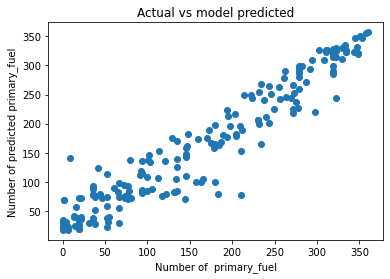

In [712]:
#plotting between actual and predicted score
plt.scatter(y_test,pred)
plt.xlabel('Number of  primary_fuel')
plt.ylabel('Number of predicted primary_fuel')
plt.title('Actual vs model predicted')
plt.show()

yes, done